# Exploring SAT Trends – A Deep Dive into NYC High School Data (Part II)

## 1. Introduction

In `Part I`, we explored the relationships between SAT scores and demographic factors in New York City public schools. As a quick reminder, the [SAT](https://en.wikipedia.org/wiki/SAT), or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each worth `800` points. Moreover, colleges use the SAT to determine which students to admit, and high average SAT scores are usually indicative of a good school.

New York City shares high school [SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) data online, along with [demographics](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) for each high school. Previously, we combined the following datasets into a single, clean pandas DataFrame:

* [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) – SAT scores for each high school in New York City.
* [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) – attendance information for each high school.
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) – class size information for each high school.
* [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) – Advanced Placement (AP) exam results for each high school.
* [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) – the percentage of students who graduated, and other outcome information.
* [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) – demographic information for each high school.
* [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) – surveys of parents, teachers, and students at each high school.

New York City has a significant immigrant population and is very diverse. Therefore, comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For instance, if certain racial groups consistently perform better on the SAT, we may have some evidence that the SAT is unfair.

## 2. Reading in the NYC High School Data

Next, we'll extend the analysis from `Part I`. We'll import all the code from our previous notebook to read in all of the data, then perform some correlation analyses. The DataFrame we named `combined` contains all of the data we'll be using.

First 3 rows of the 'ap_2010' DataFrame:

      DBN                    SchoolName AP Test Takers  Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.              39                49   
1  01M450        EAST SIDE COMMUNITY HS              19                21   
2  01M515           LOWER EASTSIDE PREP              24                26   

  Number of Exams with scores 3 4 or 5  
0                                   10  
1                                    s  
2                                   24  


First 3 rows of the 'class_size' DataFrame:

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -             

C:\Users\Gordias\AppData\Local\Temp\ipykernel_15780\1520180110.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined["school_dist"] = combined["DBN"].apply(lambda dbn: dbn[0:2])


<Figure size 650x400 with 0 Axes>

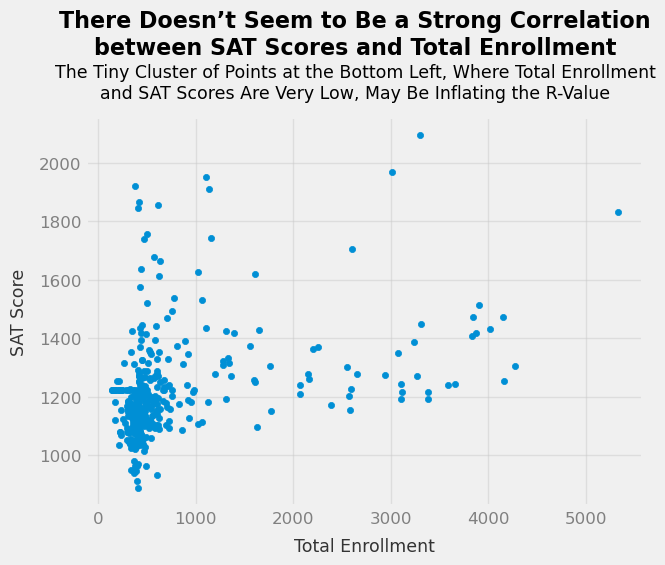

<Figure size 650x400 with 0 Axes>

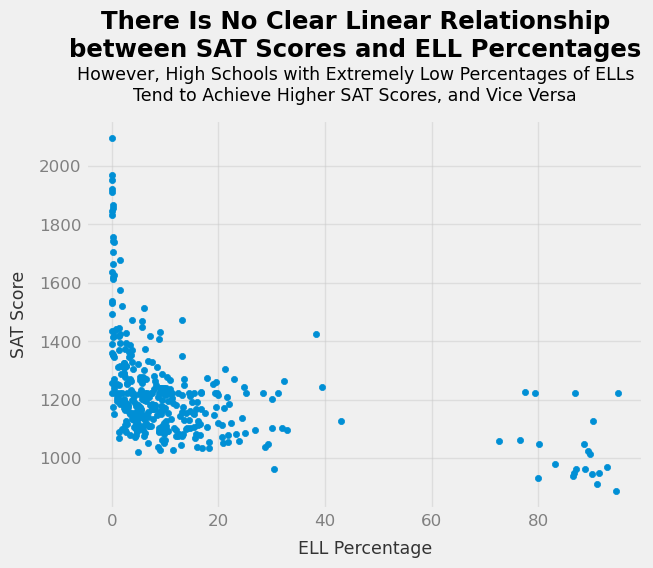

In [1]:
# Import code from the previous notebook to extend analysis
%run "9. Exploring SAT Trends – A Deep Dive into NYC High School Data (Part I).ipynb"

In [2]:
# Display the first 3 rows of the 'combined' dataset
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.00,404.00,363.00,1122.00,Unknown,129.03,197.04,...,Then to New York City residents,Unknown,Unknown,Unknown,Unknown,Unknown,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.71,-73.99,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.00,423.00,366.00,1172.00,UNIVERSITY NEIGHBORHOOD H.S.,39.00,49.00,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.71,-73.98,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.00,402.00,370.00,1149.00,EAST SIDE COMMUNITY HS,19.00,21.00,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.73,-73.98,01


After running our code, we can confirm that everything is functioning as expected. The outputs indicate successful data import and processing. Thus, we can proceed further with our analysis.

## 3. Exploring Surveys and SAT Scores

In the `combined` DataFrame, there are multiple columns that were derived from a [survey of parents, teachers, and students](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8/about_data). We will create a horizontal bar plot to visualize the correlations between these fields and `sat_score`. First, let's remove the `DBN` field since it's just a unique identifier and not a useful numerical value for correlation.

In [3]:
# Remove "DBN" from the list of survey fields, and print the updated list
survey_fields.remove("DBN")
print(survey_fields)

['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


Once we've selected the survey fields and SAT scores from the `combined` DataFrame, we can calculate their correlation.

In [4]:
# Extract survey fields and SAT scores from the `combined` DataFrame, then display the first few rows
survey_data = combined[survey_fields].copy()
survey_data['sat_score'] = combined['sat_score']
survey_data.head()

,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,sat_score
0,89.00,70,39,379.00,26.00,151.00,7.80,7.70,7.40,7.60,...,6.50,6.00,5.60,6.10,6.70,6.70,6.20,6.60,7.00,1122.00
1,84.00,95,10,385.00,37.00,46.00,7.90,7.40,7.20,7.30,...,7.30,6.00,5.70,6.30,7.00,6.80,6.30,6.70,7.20,1172.00
2,0.00,98,28,598.21,42.00,150.00,8.70,8.20,8.10,8.40,...,8.80,6.61,6.09,6.62,7.38,7.90,7.90,7.90,8.40,1149.00
3,90.00,100,21,306.00,29.00,69.00,7.70,7.40,7.20,7.30,...,6.80,6.40,5.90,6.40,7.00,6.90,6.20,6.60,7.00,1207.00
4,98.00,68,51,923.00,67.00,736.00,8.50,7.90,7.90,8.40,...,7.30,7.30,6.40,7.00,7.70,7.80,6.70,6.90,7.80,1621.00


In [5]:
# Calculate the correlation between survey fields and SAT scores,
# excluding the last row which corresponds to 'sat_score' itself
survey_sat_corr = survey_data.corr().loc['sat_score'].iloc[:-1]
survey_sat_corr

rr_s          0.23
rr_t         -0.02
rr_p          0.05
N_s           0.42
N_t           0.29
N_p           0.42
saf_p_11      0.12
com_p_11     -0.12
eng_p_11      0.02
aca_p_11      0.04
saf_t_11      0.31
com_t_11      0.08
eng_t_11      0.04
aca_t_11      0.13
saf_s_11      0.34
com_s_11      0.19
eng_s_11      0.21
aca_s_11      0.34
saf_tot_11    0.32
com_tot_11    0.08
eng_tot_11    0.10
aca_tot_11    0.19
Name: sat_score, dtype: float64

Now, we're ready to create a horizontal bar plot to visualize the correlations between the survey fields and `sat_score`.

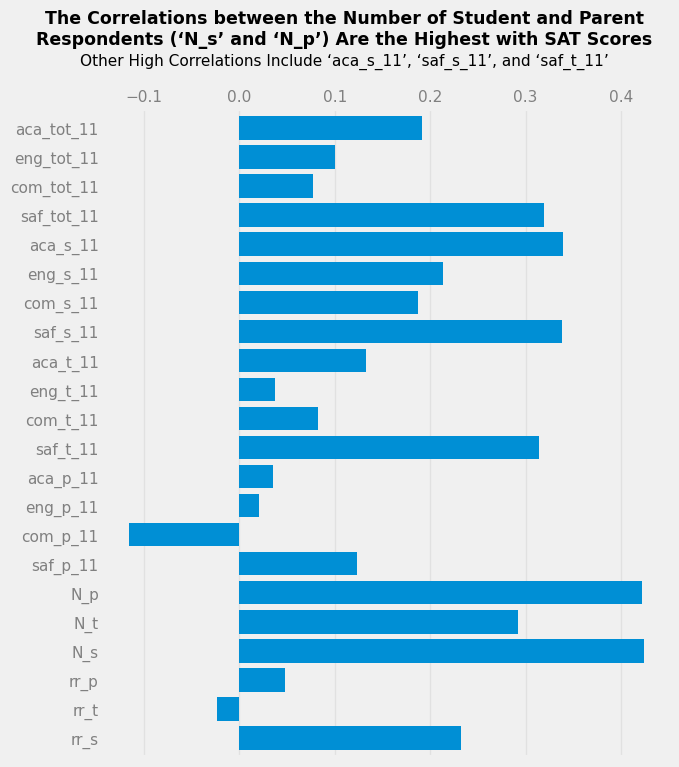

In [6]:
# Specify the size of the figure
plt.figure(figsize=(6.5, 8))

# Plot the correlation values as horizontal bar chart
survey_sat_corr.plot.barh(width=0.8)

# Add a main title and a subtitle
plt.suptitle('The Correlations between the Number of Student and Parent\n\
Respondents (‘N_s’ and ‘N_p’) Are the Highest with SAT Scores',
             ha="center", weight='bold', size=12.5, x=0.45, y=1.005)
plt.figtext(s="Other High Correlations Include ‘aca_s_11’, ‘saf_s_11’, and ‘saf_t_11’",
            ha="center", x=0.45, y=0.935, size=11)

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(labeltop=True, labelbottom=False)
plt.xticks(size=11, c='grey')
plt.yticks(size=11, c='grey')
plt.grid(axis='y', visible=False)
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.show()

Here are some insights we can glean from the horizontal bar plot:

- There are high correlations between the number of student, teacher, and parent survey respondents (`N_s`, `N_t`, and `N_p`), and `sat_score`. These columns serve as proxies for `total_enrollment`, which we previously found to be positively correlated with SAT scores.
- The student response rate (`rr_s`), which represents the percentage of students that completed the survey, correlates with `sat_score`. This correlation may be attributed to the fact that students who fill out surveys might also tend to perform well academically.
- The perception of students and teachers of safety and respect (`saf_t_11` and `saf_s_11`) correlates with `sat_score`. This correlation is logical because it's challenging to teach or learn effectively in an unsafe environment, or where mutual respect is lacking among students and staff.
- The students' perception of academic standards (`aca_s_11`) correlates with `sat_score`, but this correlation does not hold true for how teachers or parents perceive academic standards (`aca_t_11` and `aca_p_11`).

## 4. Exploring Safety and SAT Scores

We discovered that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, correlate highly with `sat_score`. Therefore, we'll delve deeper into this relationship and identify schools with low safety scores.

<Figure size 650x400 with 0 Axes>

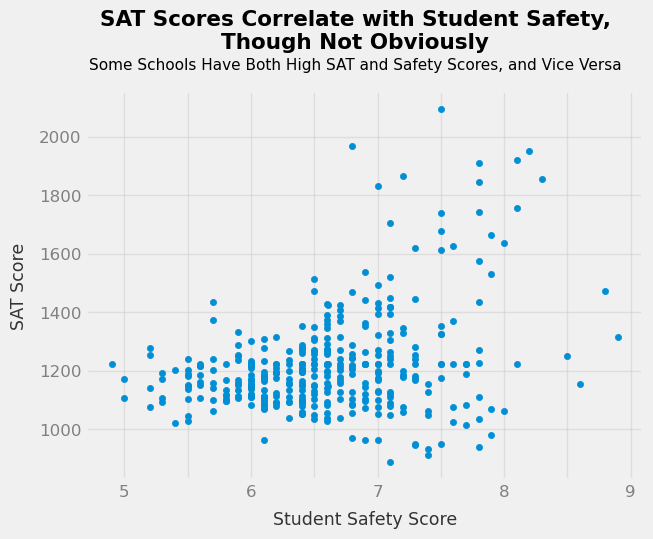

In [7]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of SAT scores against student safety scores
combined.plot.scatter("saf_s_11", "sat_score")

# Add a main title and a subtitle
plt.suptitle('SAT Scores Correlate with Student Safety,\nThough Not Obviously',
             ha="center", weight='bold', size=15.5, x=0.5, y=1.05)
plt.figtext(s="Some Schools Have Both High SAT and Safety Scores, and Vice Versa",
            ha="center", x=0.5, y=0.925, size=11)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(ticks=[5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0],
           labels=[5, '', 6, '', 7, '', 8, '', 9], size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('Student Safety Score', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

There seems to be a correlation between SAT scores and student safety, although it may not be immediately apparent. It appears that some schools have both very high SAT scores and high safety scores, while others have low SAT and safety scores. Notably, all schools with a student safety score lower than `6.5` achieve an average SAT score below `1600`. 

Next, let's compute the average student safety score for each borough.

In [8]:
# Assign the 'boro' column from the `combined` DataFrame to `combined_numeric`
combined_numeric["boro"] = combined["boro"]

# Compute and display the average safety score for each borough
boroughs = combined_numeric.groupby("boro").mean()["saf_s_11"]
boroughs

boro
Bronx           6.61
Brooklyn        6.37
Manhattan       6.83
Queens          6.72
Staten Island   6.53
Name: saf_s_11, dtype: float64

The average safety scores of students vary across boroughs, with `Manhattan` having the highest average score of `6.83`, followed by `Queens` with `6.72`. The `Bronx`, `Staten Island`, and `Brooklyn` have slightly lower average safety scores of `6.61`, `6.53`, and `6.37`, respectively. 

This indicates that students in `Manhattan` perceive their school environments as safer compared to those in other boroughs, while students in `Brooklyn` perceive theirs as relatively less safe.

## 5. Exploring Race and SAT Scores

There are several columns indicating the percentage of each race at a given school: `white_per`, `asian_per`, `black_per`, and `hispanic_per`. By plotting the correlations between these columns and `sat_score`, we can determine if there are any racial differences in SAT performance.

In [9]:
# Select race-related fields, and numeric columns from the combined dataset
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined_numeric = combined.select_dtypes(include=['number'])

# Calculate correlations between race-related fields and SAT scores
race_sat_corr = combined_numeric.corr().loc[race_fields, "sat_score"]
race_sat_corr

white_per       0.62
asian_per       0.57
black_per      -0.28
hispanic_per   -0.40
Name: sat_score, dtype: float64

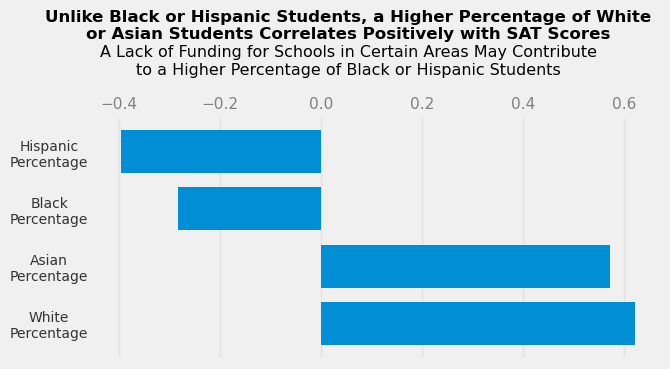

In [10]:
# Specify the size of the figure
plt.figure(figsize=(6.5, 3))

# Plot the correlation values as horizontal bar chart
race_sat_corr.plot.barh(width=0.75)

# Add a main title and a subtitle
plt.suptitle('Unlike Black or Hispanic Students, a Higher Percentage of White\n\
or Asian Students Correlates Positively with SAT Scores',
             ha="center", weight='bold', size=12, x=0.47, y=1.235)
plt.figtext(s="A Lack of Funding for Schools in Certain Areas May Contribute\n\
to a Higher Percentage of Black or Hispanic Students",
            ha="center", x=0.47, y=1.02, size=11.5)

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.tick_params(axis='y', pad=33)
plt.yticks(ticks=[0, 1, 2, 3], size=10, ha='center', c='#333333',
           labels=['White\nPercentage', 'Asian\nPercentage', 'Black\nPercentage', 'Hispanic\nPercentage'])
plt.xticks(size=11, c='grey')
plt.grid(axis='y', visible=False)
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.show()

It appears that a higher percentage of `White` or `Asian` students at a high school correlates positively with SAT scores, while a higher percentage of `Black` or `Hispanic` students correlates negatively with SAT scores. This phenomenon may be attributed to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of `Black` or `Hispanic` students.

Since `hispanic_per` shows the strongest negative correlation with `sat_score`, let's create a scatter plot of SAT scores against the percentage of Hispanic students.

<Figure size 650x400 with 0 Axes>

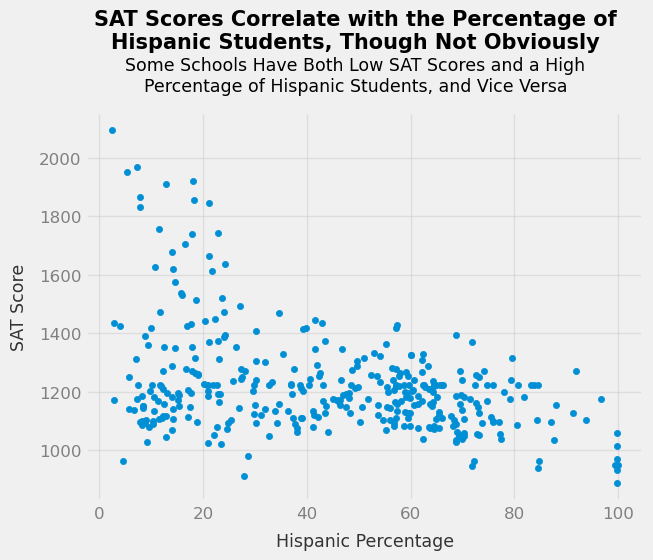

In [11]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of SAT scores against the percentage of Hispanic students
combined.plot.scatter("hispanic_per", "sat_score")

# Add a main title and a subtitle
plt.suptitle('SAT Scores Correlate with the Percentage of\n\
Hispanic Students, Though Not Obviously',
             ha="center", weight='bold', size=15, x=0.5, y=1.095)
plt.figtext(s="Some Schools Have Both Low SAT Scores and a High\n\
Percentage of Hispanic Students, and Vice Versa",
            ha="center", x=0.5, y=0.925, size=12.5)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('Hispanic Percentage', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

There appears to be a correlation between SAT scores and the percentage of Hispanic students, although it may not be immediately apparent. Some high schools have both very low SAT scores and a very high percentage of Hispanic students nearing `100%`, while other schools have a low percentage of Hispanic students and high SAT scores. Therefore, we want to analyze further these types of schools.

In [12]:
# Display schools with a Hispanic percentage exceeding 95%
combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily serve recent immigrants to the U.S. They likely have many students who are still learning English, which could justify the lower SAT scores.

In [13]:
# Display schools with a Hispanic percentage less than 10% and SAT scores exceeding 1800
combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"]

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Most of these schools specialize in science and technology, receive additional funding, or have selective admission criteria requiring students to pass an entrance exam. Also, their students come from across all New York City. So it makes sense why these high-achieving students tend to perform better on the SAT.

## 6. Exploring Gender and SAT Scores

There are two columns that indicate the percentage of each gender at a high school – `male_per` and `female_per`. So we will plot the correlations between each percentage and `sat_score`.

In [14]:
# Select gender-related fields and calculate their correlations against SAT scores
gender_fields = ["male_per", "female_per"]

gender_sat_corr = combined_numeric.corr().loc[gender_fields, "sat_score"]
gender_sat_corr

male_per     -0.11
female_per    0.11
Name: sat_score, dtype: float64

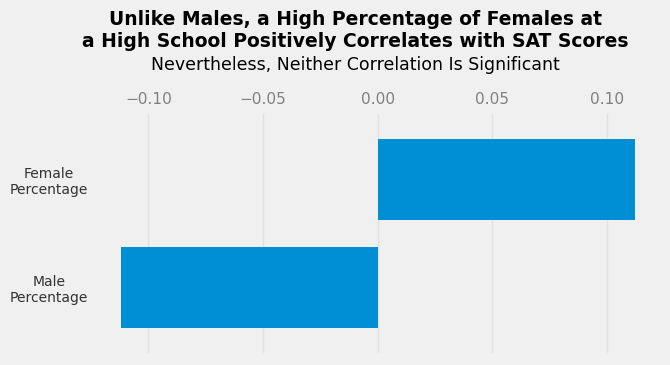

In [15]:
# Specify the size of the figure
plt.figure(figsize=(6.5, 3))

# Plot the correlation values as horizontal bar chart
gender_sat_corr.plot.barh(width=0.75)

# Add a main title and a subtitle
plt.suptitle('Unlike Males, a High Percentage of Females at\n\
a High School Positively Correlates with SAT Scores',
             ha="center", weight='bold', size=13.5, x=0.48, y=1.22)
plt.figtext(s="Nevertheless, Neither Correlation Is Significant",
            ha="center", x=0.48, y=1.02, size=12.5)

# Customize ticks and gridlines for both axes, and move x-axis ticks to the top
plt.tick_params(labeltop=True, labelbottom=False)
plt.tick_params(axis='y', pad=33)
plt.yticks(ticks=[0, 1], labels=['Male\nPercentage', 'Female\nPercentage'],
           size=10, ha='center', c='#333333')
plt.xticks(size=11, c='grey')
plt.grid(axis='y', visible=False)
plt.grid(axis='x', alpha=0.4)

# Display the plot
plt.show()

In the plot above, we observe that a high percentage of females at a school positively correlates with SAT scores, while a high percentage of males at a school negatively correlates with SAT scores. However, neither correlation is significant.

Next, let's create a scatter plot of `female_per` against `sat_score` to investigate schools with high SAT scores and a high percentage of females.

<Figure size 650x400 with 0 Axes>

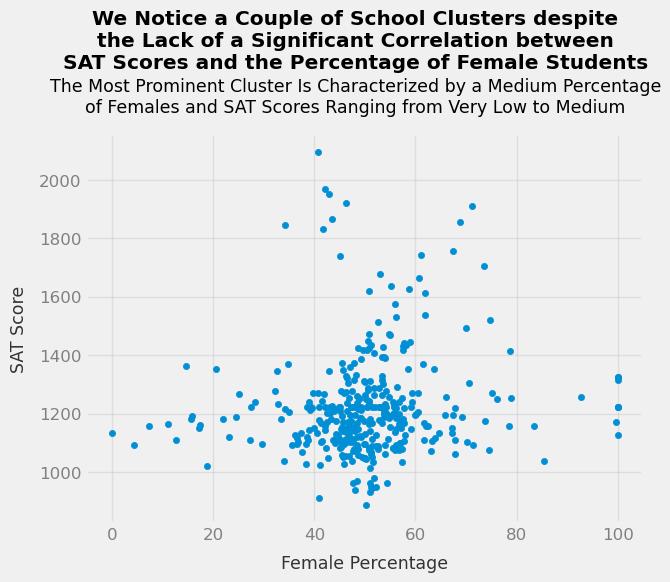

In [16]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of SAT scores against the percentage of female students
combined.plot.scatter("female_per", "sat_score")

# Add a main title and a subtitle
plt.suptitle('We Notice a Couple of School Clusters despite\n\
the Lack of a Significant Correlation between\n\
SAT Scores and the Percentage of Female Students',
             ha="center", weight='bold', size=14.5, x=0.5, y=1.14)
plt.figtext(s="The Most Prominent Cluster Is Characterized by a Medium Percentage\n\
of Females and SAT Scores Ranging from Very Low to Medium",
            ha="center", x=0.5, y=0.925, size=12.5)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('Female Percentage', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

Based on the scatter plot, there doesn't appear to be any significant correlation between `sat_score` and `female_per`. However, we notice a large cluster of high schools with a medium percentage of females, around `40%` to `60%`, and SAT scores ranging from very low to medium, below `1400`.

Additionally, there is a small cluster of schools with a high percentage of females, between `60%` and `80%`, and high SAT scores exceeding `1700`. So let's further investigate this cluster.

In [17]:
# Display schools with a female percentage greater than 60% and SAT scores exceeding 1700
combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Apparently, these schools are very selective liberal arts schools known for their high academic standards.

## 7. Exploring AP Scores and SAT Scores

High school students in the U.S. take [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) exams to earn college credit. Hence, it's logical that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. However, we want to focus on the percentage of students in each school who took at least one AP exam.

In [18]:
# Calculate the percentage of students who took at least one AP exam
combined["ap_per"] = (combined["AP Test Takers"] / combined["total_enrollment"]) * 100

# Calculate the correlation coefficient between SAT scores and AP exam participation percentage
print(f'Correlation coefficient: {combined["sat_score"].corr(combined["ap_per"]).round(2)}')

Correlation coefficient: 0.06


C:\Users\Gordias\AppData\Local\Temp\ipykernel_15780\4241181133.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined["ap_per"] = (combined["AP Test Takers"] / combined["total_enrollment"]) * 100


The correlation coefficient of `0.06` suggests a very weak positive correlation between SAT scores and AP exam participation percentage. This indicates that there is little to no relationship between the two variables. Next, let's plot a scatter plot to visualize this relationship.

<Figure size 650x400 with 0 Axes>

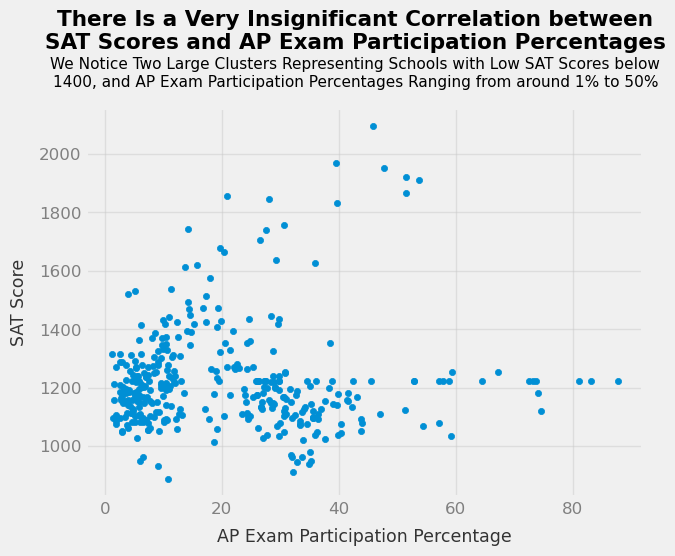

In [19]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of SAT scores against the percentage of students that took an AP exam
combined.plot.scatter(x='ap_per', y='sat_score')

# Add a main title and a subtitle
plt.suptitle('There Is a Very Insignificant Correlation between\n\
SAT Scores and AP Exam Participation Percentages',
             ha="center", weight='bold', size=15.5, x=0.5, y=1.085)
plt.figtext(s="We Notice Two Large Clusters Representing Schools with Low SAT Scores below\n\
1400, and AP Exam Participation Percentages Ranging from around 1% to 50%",
            ha="center", x=0.5, y=0.925, size=11)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('AP Exam Participation Percentage', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

This plot confirms the correlation coefficient of `0.06` we calculated, indicating a very weak positive correlation between SAT scores and the percentage of students who took an AP exam. However, we notice two large clusters representing high schools with low SAT scores below `1400`, and AP exam participation percentages ranging from around `1%` to `50%`.

Additionally, there are a few schools with AP participation percentages above `80%` and SAT scores just slightly above `1200`. As for the high schools with high SAT scores, they are characterized by AP participation percentages around `20%` and `55%`.

## 8. Conclusion

In `Part II`, we extended the analysis from `Part I`. We successfully imported all the code from our previous notebook and read in all of the data. The DataFrame we named `combined` contains all of the data we've been using.

We explored and visualized correlations between surveys and SAT scores, safety and SAT scores, race and SAT scores, gender and SAT scores, and AP scores and SAT scores. Each correlation pair exhibited varying degrees of correlation, whether positive or negative.

Here are some insights we've reached:
- The number of student, teacher, and parent survey respondents shows a strong positive correlation with SAT scores, serving as proxies for total enrollment.
- Survey completion rates, perceptions of safety by students and teachers, and student perceptions of academic standards all positively correlate with SAT scores.
- Students in `Manhattan` perceive their schools as safer than those in other boroughs, particularly `Brooklyn`.
- A higher percentage of `White` or `Asian` students correlates positively with SAT scores, unlike a higher percentage of `Black` or `Hispanic` students.
- The percentage and number of females at a school correlate positively with SAT scores, unlike the percentage and number of males. However, neither correlation is significant.
- There's a very weak positive correlation between the percentage of students taking the AP exam and average SAT scores.